# Download Libraries

In [1]:
!pip install opencv-python opencv-python-headless

# Exercise 1. Harris Corner Detection

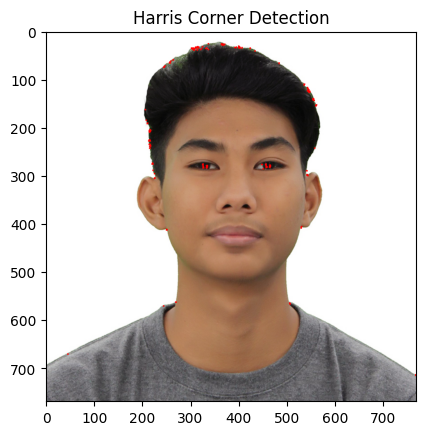

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Pictureme.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
gray = np.float32(gray)
harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image for better visualization
harris_corners = cv2.dilate(harris_corners, None)

# Mark the corners in the original image
image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.show()


# Exercise 2. HOG (Histogram of Oriented Gradients) Feature Extraction

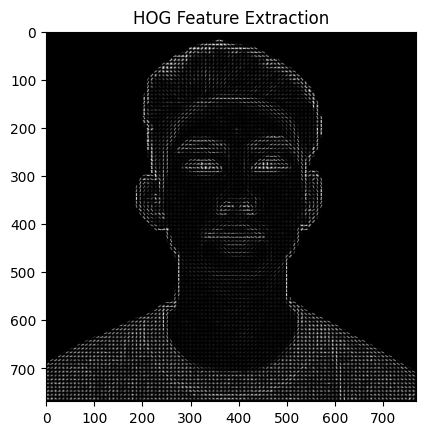

In [4]:
from skimage.feature import hog
from skimage import data, exposure

# Load an image
image = cv2.imread('Pictureme.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# HOG feature extraction
hog_features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

# Enhance the HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the image
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Feature Extraction')
plt.show()


# Exercise 3. FAST Keypoint Detection

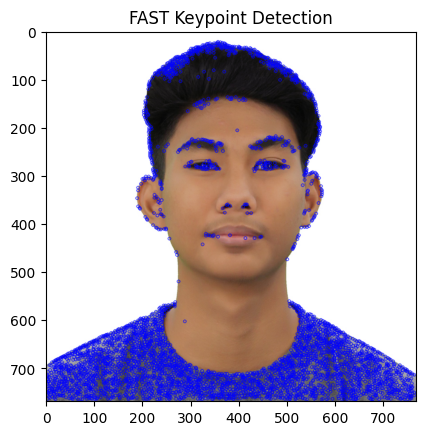

In [6]:
# Load an image
image = cv2.imread('Pictureme.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# FAST Keypoint Detector
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(gray, None)

# Draw keypoints on the image
output_image = cv2.drawKeypoints(image, keypoints, None, color=(255, 0, 0))

# Display the image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('FAST Keypoint Detection')
plt.show()


# Exercise 4. Feature Matching using ORB and FLANN

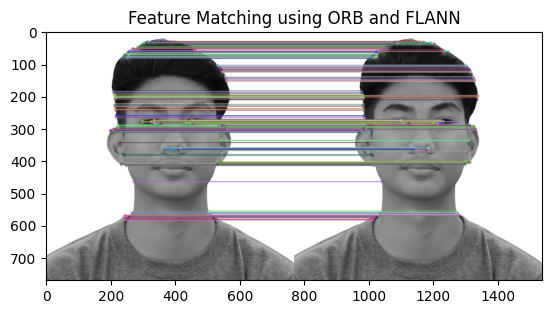

In [28]:
# Load two images
img1 = cv2.imread('Pictureme.jpg', 0)
img2 = cv2.imread('Pictureme.jpg', 0)

# Initialize ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Initialize FLANN-based matcher
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors
matches = flann.knnMatch(des1, des2, k=2)

# Store all the good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

# Display the matched features
plt.imshow(result)
plt.title('Feature Matching using ORB and FLANN')
plt.show()


# Exercise 5. Image Segmentation using Watershed Algorithm

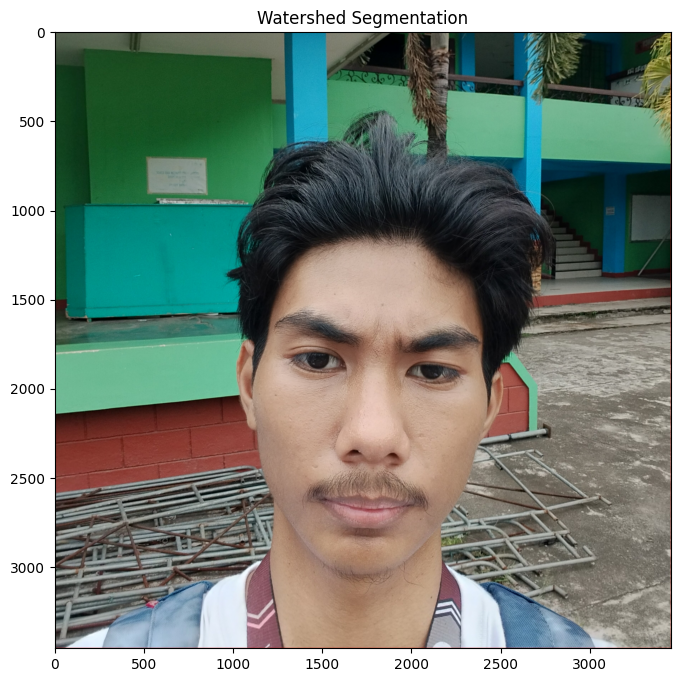

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('Pictureme2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply threshold to convert the image to binary
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using Morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Finding sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the unknown regions with 0
markers[unknown == 0] = 0

# Apply the Watershed algorithm
markers = cv2.watershed(image, markers)

# Mark the boundaries in red
image[markers == -1] = [255, 0, 0]

# Optional: Enhance boundaries for better visualization
boundary_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boundary_img[markers == -1] = [255, 0, 0]  # Set boundaries to red

# Display the segmented regions with boundaries in red
plt.figure(figsize=(10, 8))
plt.imshow(boundary_img)
plt.title('Watershed Segmentation')
plt.show()
